In [29]:
import scanpy as sc
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [30]:
adata = sc.read_h5ad('control_annotated_data.h5ad')

In [31]:
print(adata)

AnnData object with n_obs × n_vars = 96303 × 45947
    obs: 'cell_type_category', 'manuscript_id', 'subclass_id', 'disease', 'subject_id', 'age'
    var: 'HGNC_Alt_GeneID'


In [32]:
sc.pp.filter_cells(adata, min_genes=100, inplace=True)

In [33]:
sc.pp.filter_genes(adata, min_cells=3, inplace=True)

In [34]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [35]:
sc.pp.log1p(adata)

In [36]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

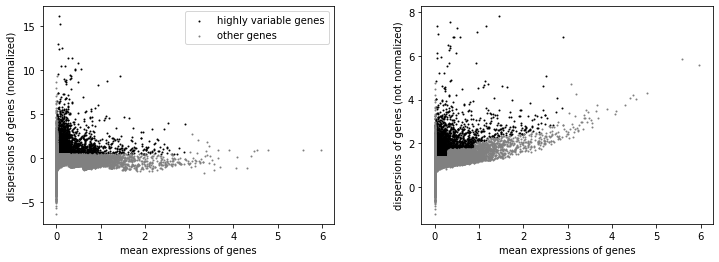

In [37]:
sc.pl.highly_variable_genes(adata)

In [38]:
adata = adata[:, adata.var.highly_variable]

In [39]:
print(adata)

View of AnnData object with n_obs × n_vars = 96303 × 4443
    obs: 'cell_type_category', 'manuscript_id', 'subclass_id', 'disease', 'subject_id', 'age', 'n_genes'
    var: 'HGNC_Alt_GeneID', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'


In [40]:
sc.tl.pca(adata, svd_solver='arpack')

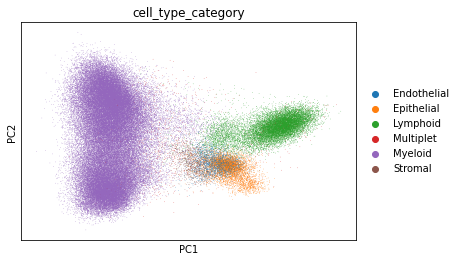

In [41]:
sc.pl.pca(adata, color='cell_type_category')

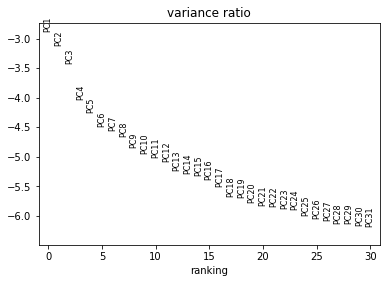

In [42]:
sc.pl.pca_variance_ratio(adata, log=True)

In [43]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [44]:
sc.tl.umap(adata)

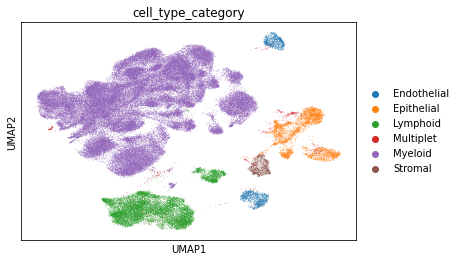

In [45]:
sc.pl.umap(adata, color=['cell_type_category'])

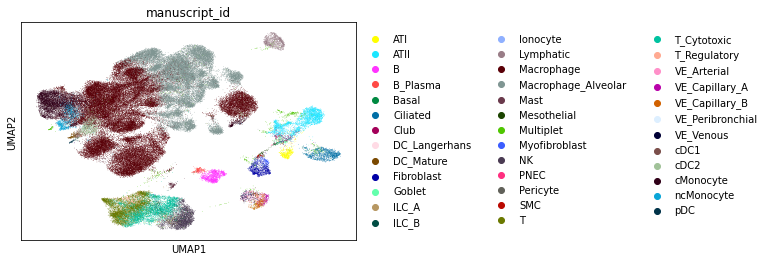

In [83]:
sc.pl.umap(adata, color=['manuscript_id'])

In [84]:
print(adata.obsm['X_pca'].shape)

(96303, 50)


In [85]:
print(adata.obsm['X_umap'])

[[-6.8512683 10.169996 ]
 [ 2.8701127 14.209575 ]
 [ 1.782113  -4.813733 ]
 ...
 [-2.665838   9.9837055]
 [-2.3848925 -4.21047  ]
 [ 1.7709979 13.921766 ]]


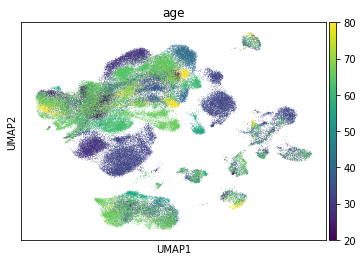

In [86]:
sc.pl.umap(adata, color=['age'])

In [79]:
X = adata.obsm['X_pca'][:,0:40] #take first 40 pca as features
y = pd.factorize(adata.obs['cell_type_category'])[0] #factorize categories

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) #split training set and testing set

In [81]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(penalty='l2', tol=1e-6, max_iter=int(1e6))
LR.fit(X_train, y_train)
print("Training Accuracy: ", LR.score(X_train, y_train))
print("Testing Accuracy: ", LR.score(X_test, y_test))

Training Accuracy:  0.9930427817005875
Testing Accuracy:  0.9919005918798242


In [109]:
# import data again
adata = sc.read_h5ad('control_annotated_data.h5ad')
sc.pp.filter_cells(adata, min_genes=100, inplace=True)
sc.pp.filter_genes(adata, min_cells=3, inplace=True)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]
print(adata)

View of AnnData object with n_obs × n_vars = 96303 × 4443
    obs: 'cell_type_category', 'manuscript_id', 'subclass_id', 'disease', 'subject_id', 'age', 'n_genes'
    var: 'HGNC_Alt_GeneID', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'


In [90]:
from collections import Counter
print(Counter(adata.obs['subject_id'].to_list()))

Counter({'226C': 10736, '222C': 10110, '098C': 9240, '133C': 8566, '439C': 7197, '218C': 4823, '1372C': 4595, '160C': 4541, '092C': 4319, '192C': 4028, '003C': 3460, '296C': 3303, '465C': 2622, '388C': 2287, '483C': 2166, '208C': 2049, '065C': 1883, '001C': 1862, '396C': 1268, '454C': 1163, '484C': 1110, '137C': 999, '081C': 982, '253C': 945, '034C': 706, '002C': 700, '084C': 477, '244C': 166})


In [104]:
# take '388C' as the validation individual
num = []
for i in range(adata.obs.shape[0]):
    if adata.obs['subject_id'][i] == '388C':
        num.append(i)
print("range of '388C': ", num[0], "-", num[-1])

range of '388C':  78490 - 80776


In [124]:
import anndata as ad
test = adata[num[0]:num[-1]+1]
train_1 = adata[:num[0]]
train_2 = adata[num[-1]+1:]
train = ad.concat([train_1, train_2])
print(test,train,adata)

View of AnnData object with n_obs × n_vars = 2287 × 4443
    obs: 'cell_type_category', 'manuscript_id', 'subclass_id', 'disease', 'subject_id', 'age', 'n_genes'
    var: 'HGNC_Alt_GeneID', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg' AnnData object with n_obs × n_vars = 94016 × 4443
    obs: 'cell_type_category', 'manuscript_id', 'subclass_id', 'disease', 'subject_id', 'age', 'n_genes' View of AnnData object with n_obs × n_vars = 96303 × 4443
    obs: 'cell_type_category', 'manuscript_id', 'subclass_id', 'disease', 'subject_id', 'age', 'n_genes'
    var: 'HGNC_Alt_GeneID', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'


In [120]:
sc.tl.pca(train, svd_solver='arpack')
sc.tl.pca(test, svd_solver='arpack')

In [122]:
X_train = train.obsm['X_pca'][:,0:40] #take first 40 pca as features
y_train = pd.factorize(train.obs['cell_type_category'])[0] #factorize categories
X_test = test.obsm['X_pca'][:,0:40] 
y_test = pd.factorize(test.obs['cell_type_category'])[0]

In [123]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(penalty='l2', tol=1e-6, max_iter=int(1e6))
LR.fit(X_train, y_train)
print("Training Accuracy: ", LR.score(X_train, y_train))
print("Testing Accuracy: ", LR.score(X_test, y_test))

Training Accuracy:  0.9926289142273655
Testing Accuracy:  0.5574989068648885
